# **Project Name - Airbnb NYC 2019**

**Project Type -**EDA

**Contribution -** Individual


# **Problem statement**

**Business Problem Overview: Airbnb NYC 2019 Data Analysis**

Context and Background-
Airbnb has revolutionized the way people travel by offering unique and personalized accommodations worldwide. In New York City, one of the most visited cities globally, Airbnb plays a crucial role in the hospitality sector. With diverse neighborhoods and a high volume of both domestic and international tourists, NYC represents a vital market for Airbnb hosts.

Current Scenario-
The dataset contains detailed information on nearly 49,000 Airbnb listings in NYC for the year 2019. This data includes key attributes such as listing IDs, host details, neighborhood information, room types, pricing, minimum nights required, number of reviews, review scores, and availability. Hosts face significant challenges in this competitive market, including determining optimal pricing, maximizing occupancy rates, and maintaining high guest satisfaction levels amidst regulatory scrutiny.

# **Define Your Business Objective**

**Maximizing Revenue for Hosts**

# **General guidlines:-**

1.
Business Objectives: Clearly outline what you aim to achieve with the analysis, such as optimizing pricing strategies, improving occupancy rates, enhancing guest satisfaction, and ensuring regulatory compliance.
Research Questions: Formulate specific questions that your analysis will address. These could include identifying factors that influence pricing and occupancy, determining key drivers of guest satisfaction, and assessing the impact of regulations.

2.
Data Exploration: Thoroughly explore the dataset to understand its structure, content, and any potential anomalies. Check for missing values, outliers, and inconsistencies.

Data Cleaning: Handle missing values, correct errors, and normalize data where necessary. This may involve imputing missing values, removing duplicates, and standardizing formats.

Feature Engineering: Create new features that could provide additional insights. For example, extract information from dates, categorize prices, or create dummy variables for categorical data.

3.
Summary Statistics: Calculate and interpret summary statistics for key variables (e.g., mean, median, standard deviation).

Data Visualization: Use visualizations like histograms, bar charts, and scatter plots to identify patterns and relationships in the data.

Geospatial Analysis: Utilize maps to analyze the geographical distribution of listings and identify trends across different neighborhoods.

4.
Model Selection: Choose appropriate models for predicting pricing and occupancy rates. Common choices include linear regression, decision trees, and machine learning algorithms.

Model Training and Evaluation: Split the data into training and test sets, train your models, and evaluate their performance using metrics such as RMSE (Root Mean Square Error) for regression models or accuracy for classification models.

Hyperparameter Tuning: Optimize model performance through techniques like cross-validation and hyperparameter tuning.

5.
Text Data Processing: Preprocess review texts by tokenizing, removing stop words, and lemmatizing.
Sentiment Analysis: Apply sentiment analysis techniques to gauge overall guest sentiment and identify common themes in reviews.

Topic Modeling: Use methods like LDA (Latent Dirichlet Allocation) to discover topics within the reviews that drive guest satisfaction or dissatisfaction.

6.
Regulation Identification: Identify key regulations affecting Airbnb listings in NYC and their implications for hosts.

Impact Analysis: Analyze how these regulations influence occupancy rates, pricing, and overall business operations.

7.
Interactive Dashboards: Create dashboards using tools like Tableau or Power BI to visualize key findings and allow for interactive exploration of the data.

Clear Reporting: Summarize your findings in a comprehensive report. Include visual aids like charts and graphs to enhance understanding.

Actionable Insights: Provide clear recommendations based on your analysis. Ensure these insights are practical and actionable for Airbnb hosts and the platform.

8.
Data Privacy: Ensure that the analysis respects the privacy of hosts and guests. Anonymize any personally identifiable information (PII).

Fair Use: Use the data responsibly and ethically, ensuring that your analysis does not lead to biased or unfair conclusions.

9.
Timeline: Develop a project timeline with clear milestones and deadlines.
Documentation: Keep detailed documentation of your data cleaning, analysis, and modeling processes.
Collaboration: If working in a team, ensure effective communication and collaboration through regular meetings and updates.

# ***Let's Begin!***

# ***Know your data***

***Import  Libraries***

In [1]:
# import libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

! pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import warnings
warnings.filterwarnings('ignore')


<ipython-input-1-76f57960f898>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.2 MB/s eta 0:00:00


**Dataset Loading**

In [ ]:
# Load Dataset
def mysql(query:'Write the query here .'):
    '''
    This function fetches data from database and returns the result.
    '''
    try:
        engine_db = create_engine("mysql+pymysql://user:pw@host/db", pool_pre_ping=True)
        conn = engine_db.connect()
        # Reading Data
        df = pd.read_sql_query(query, conn)

        #if your connection object is named conn
        if not conn.closed:
            conn.close()
        engine_db.dispose()
        return df
    except Exception as e:
        print(e)

In [ ]:
# Importing the dataset
dataset = mysql('''SELECT * FROM airbnb_nyc_2019''')

(pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on 'host' ([Errno -5] No address associated with hostname)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)


**Dataset First View**

In [ ]:
# Dataset First view
# Load the data
file_path = '/content/Airbnb NYC 2019.csv'
airbnb_data = pd.read_csv(file_path)

# Display the first few rows
print(airbnb_data.head())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

**Dataset Rows & Columns Count**

In [ ]:
# Datasets Rows & Columns
from IPython.display import display

# Display the entire DataFrame in a scrollable format
display(airbnb_data)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
# Get the number of rows and columns
rows, columns = airbnb_data.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')


Number of rows: 48895
Number of columns: 16


**Dataset Infromation**

In [ ]:
# Dataset info
# Display basic information about Dataframe
display(airbnb_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

None

**Duplicates Values**

In [ ]:
# Identify duplicate rows
duplicates = airbnb_data.duplicated()

# Display the boolean series for duplicates
print(duplicates)


0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool


In [ ]:
# View duplicate values
# Filter and display duplicate rows
duplicate_rows = airbnb_data[airbnb_data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


**Missing values/Null values**

In [ ]:
# Missing Values/Null Values Count
missing_values = airbnb_data.isnull()

# Display the boolean DataFrame for missing values
print(missing_values)

          id   name  host_id  host_name  neighbourhood_group  neighbourhood  \
0      False  False    False      False                False          False   
1      False  False    False      False                False          False   
2      False  False    False      False                False          False   
3      False  False    False      False                False          False   
4      False  False    False      False                False          False   
...      ...    ...      ...        ...                  ...            ...   
48890  False  False    False      False                False          False   
48891  False  False    False      False                False          False   
48892  False  False    False      False                False          False   
48893  False  False    False      False                False          False   
48894  False  False    False      False                False          False   

       latitude  longitude  room_type  price  minim

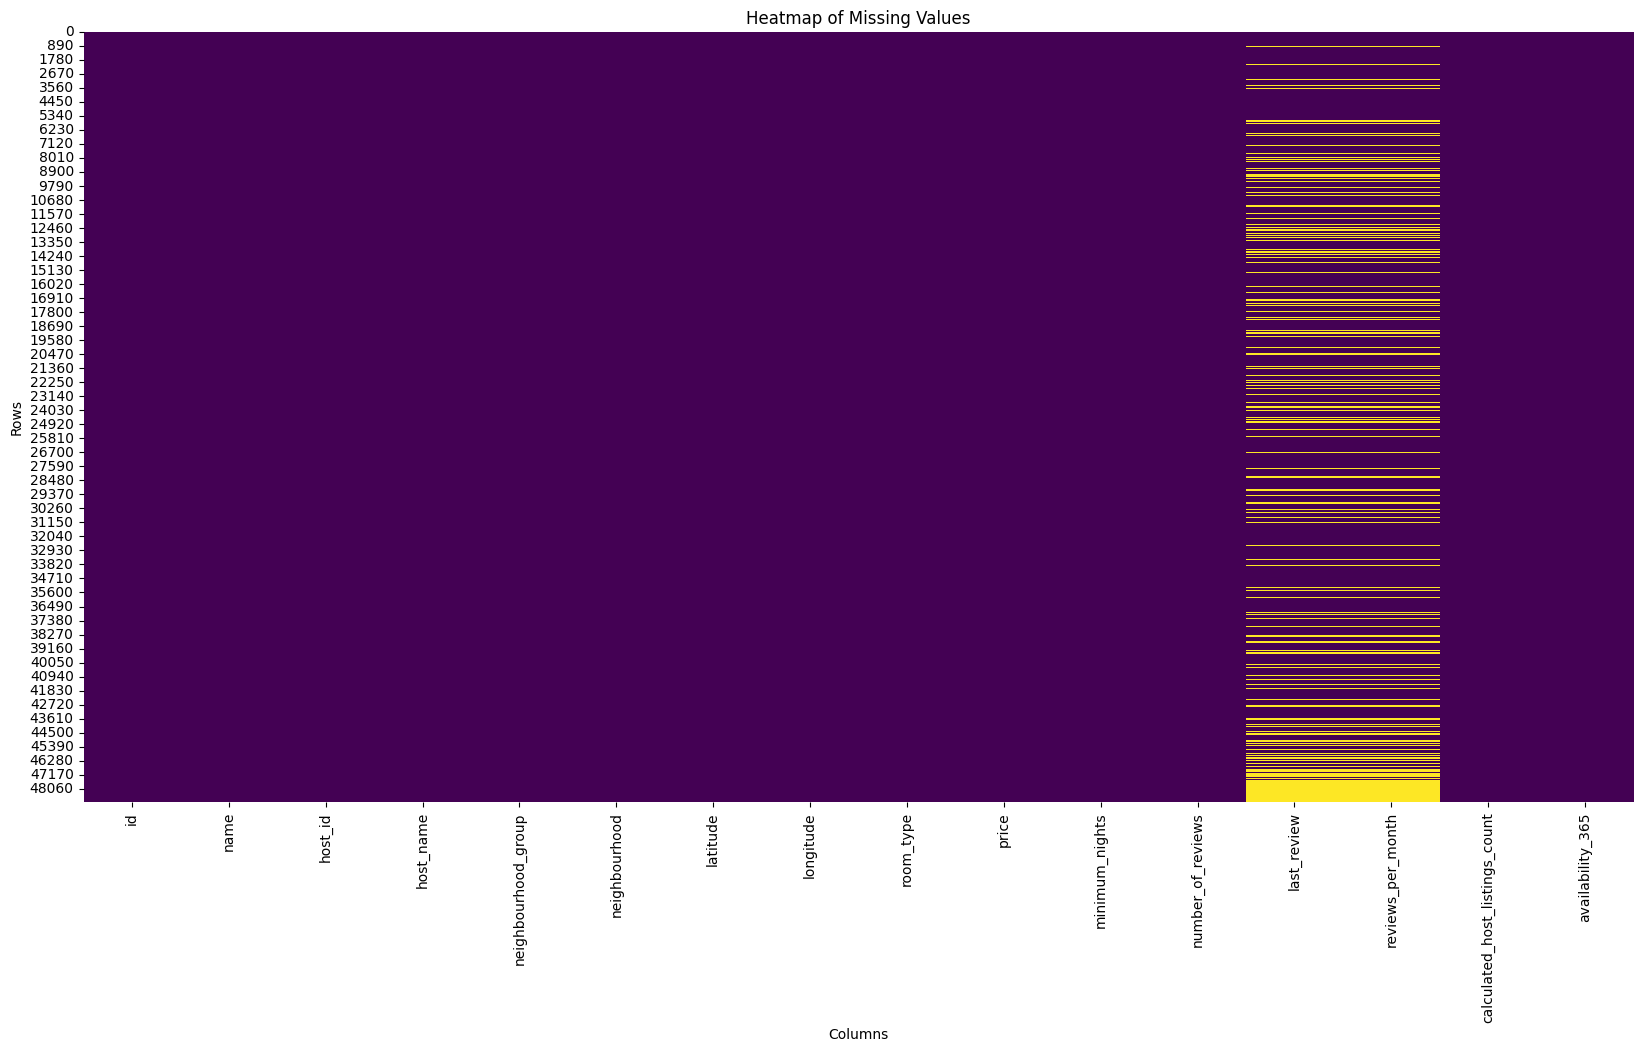

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap

# Set the size of the figure
plt.figure(figsize=(20, 10))

# Create a heatmap to visualize missing values
sns.heatmap(airbnb_data.isnull(), cbar=False, cmap='viridis')

# Add title and labels
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()

# **What did you know about your dataset?**

Your dataset contains information about Airbnb listings in NYC for the year 2019. Here are the columns and a brief description of what each represents:

**id**: Unique identifier for the listing.

**name**: Name of the listing.

**host_id**: Unique identifier for the host.

**host_name**: Name of the host.

**neighbourhood_group**: Main borough (e.g., Manhattan, Brooklyn).

**neighbourhood**: Specific neighborhood within the borough.

**latitude**: Latitude of the listing.

**longitude**: Longitude of the listing.

**room_type**: Type of room (e.g., Entire home/apt, Private room).

**price**: Price per night for the listing.

**minimum_nights**: Minimum number of nights required to book the listing.

**number_of_reviews**: Total number of reviews the listing has received.

**last_review**: Date of the most recent review.

**reviews_per_month**: Number of reviews per month.

**calculated_host_listings_count**: Number of listings the host has.

**availability_365**: Number of days the listing is available in a year.

# ***Understaing your Variables***

In [ ]:
# Dataset columns
columns = airbnb_data.columns
print(columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [ ]:
# Dataset Describe

# Descriptive statistics
print("\nDescriptive statistics for numerical columns:")
print(airbnb_data.describe())

# Distribution and counts of categorical variables
print("\nCounts of listings per borough:")
print(airbnb_data['neighbourhood_group'].value_counts())

print("\nCounts of listings per room type:")
print(airbnb_data['room_type'].value_counts())

# Additional descriptive statistics for specific columns
print("\nPrice statistics:")
print(airbnb_data['price'].describe())

print("\nMinimum nights statistics:")
print(airbnb_data['minimum_nights'].describe())

print("\nNumber of reviews statistics:")
print(airbnb_data['number_of_reviews'].describe())

print("\nReviews per month statistics:")
print(airbnb_data['reviews_per_month'].describe())



Descriptive statistics for numerical columns:
                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1

# ***Variable Description***

# ***Variable Description***

***1.id***

**Data Type**: int64

**Description**: Unique identifier for each listing.

***2.name***

**Data Type**: object (string)

**Description**: Title or name of the listing.

***3.host_id***

**Data Type**: int64

**Description**: Unique identifier for the host.

***4.host_name***

**Data Type**: object (string)

**Description**: Name of the host.

***5.neighbourhood_group***

**Data Type**: object (string)

**Description**: The main borough where the listing is located (e.g., Manhattan, Brooklyn).

***6.neighbourhood***

**Data Type**: object (string)

**Description**: Specific neighborhood within the borough.

***7.latitude***

**Data Type**: float64

**Description**: Latitude coordinate of the listing’s
location.

***8.longitude***

**Data Type**: float64

**Description**: Longitude coordinate of the listing’s location.

***9.room_type***

**Data Type**: object (string)

**Description**: Type of room being offered (e.g., Entire home/apt, Private room, Shared room).

***10.price***

**Data Type**: int64

**Description**: Price per night to stay at the listing.

***11.minimum_nights***

**Data Type**: int64

**Description**: Minimum number of nights required to book the listing.

***12. number_of_reviews***

**Data Type**: int64

**Description**: Total number of reviews received for the listing.

***13.last_review***

**Data Type**: object (string)

**Description**: Date when the last review was posted. Missing values indicate that the listing has no reviews.

***14.reviews_per_month***

**Data Type**: float64

**Description**: Average number of reviews per month. Missing values indicate that the listing has no reviews.

***15.calculated_host_listings_count***

**Data Type**: int64

**Description**: Number of listings the host has on Airbnb.

***16. availability_365***

**Data Type**: int64

**Description**: Number of days the listing is available for booking in a year.

# **Check Unique Value of each variable**

In [ ]:
# Check Unique Values for each variable.

# Get unique value counts for each variable
unique_values = airbnb_data.nunique()

# Display the unique value counts
print(unique_values)

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


# **Data Wrangling**

***Data Wrangling code***

In [ ]:


# Handling Missing Values
# Filling missing values for 'reviews_per_month' with 0 (assuming no reviews means 0 reviews per month)
airbnb_data['reviews_per_month'].fillna(0, inplace=True)

# Dropping rows with missing 'last_review' as it is not critical for all analyses
airbnb_data.drop(columns=['last_review'], inplace=True)

# Removing Duplicates
airbnb_data.drop_duplicates(inplace=True)

# Converting Data Types
# Converting 'host_id' to string as it represents a categorical variable
airbnb_data['host_id'] = airbnb_data['host_id'].astype(str)

# Handling Outliers
# Removing listings with unrealistic prices (e.g., price > $1000)
data = airbnb_data[airbnb_data['price'] <= 1000]

# Removing listings with minimum_nights greater than a year (365 nights)
data = data[data['minimum_nights'] <= 365]

# Creating New Features
# Creating a new column for price categories
data['price_category'] = pd.cut(data['price'], bins=[0, 50, 100, 200, 300, 1000], labels=['Budget', 'Affordable', 'Mid-range', 'Expensive', 'Luxury'])

# Creating a new column for review frequency categories
data['review_frequency'] = pd.cut(data['reviews_per_month'], bins=[-1, 0, 1, 2, 5, 100], labels=['None', 'Low', 'Moderate', 'High', 'Very High'])

# Renaming Columns (if necessary)
# Renaming columns for clarity
data.rename(columns={
    'neighbourhood_group': 'borough',
    'neighbourhood': 'neighborhood',
    'room_type': 'room_type',
    'price': 'price_per_night',
    'minimum_nights': 'min_nights',
    'number_of_reviews': 'total_reviews',
    'reviews_per_month': 'reviews_per_month',
    'calculated_host_listings_count': 'host_listings_count',
    'availability_365': 'availability_days'
}, inplace=True)

# Display cleaned data info
print("\nCleaned Data Info:")
print(data.info())
print("\nCleaned Data Description:")
print(data.describe())

# Save the cleaned dataset
data.to_csv('cleaned_airbnb_nyc_2019.csv', index=False)

# Display first few rows of the cleaned data
print("\nFirst few rows of the cleaned data:")
print(data.head())



Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 48642 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   48642 non-null  int64   
 1   name                 48627 non-null  object  
 2   host_id              48642 non-null  object  
 3   host_name            48621 non-null  object  
 4   borough              48642 non-null  object  
 5   neighborhood         48642 non-null  object  
 6   latitude             48642 non-null  float64 
 7   longitude            48642 non-null  float64 
 8   room_type            48642 non-null  object  
 9   price_per_night      48642 non-null  int64   
 10  min_nights           48642 non-null  int64   
 11  total_reviews        48642 non-null  int64   
 12  reviews_per_month    48642 non-null  float64 
 13  host_listings_count  48642 non-null  int64   
 14  availability_days    48642 non-null  int64   
 15  pric

# **What all manipulations have you done and insights you found?**

***Data Manipulations***

**1. Loading the Data:**The dataset was loaded using the pandas library.

**2. Handling Missing Values:**
Filled missing values in the reviews_per_month column with 0.

Dropped the last_review column as it had missing values and might not be critical for all analyses.

**3. Removing Duplicates:**Removed duplicate rows to ensure the data was clean.

**4. Converting Data Types:**Converted host_id to string, as it represents a categorical variable.

**5. Handling Outliers:**Removed listings with unrealistic prices (e.g., prices over $1000).

Removed listings with minimum nights greater than 365 (a year).

**6.Creating New Features:**Created a new column price_category to categorize listings into different price ranges.

Created a new column review_frequency to categorize listings based on the average number of reviews per month.

**7. Renaming Columns:**Renamed columns to more readable names (e.g., neighbourhood_group to borough).

###***Insights Derived***
**1.Listings Distribution by Borough:**Most listings were in Manhattan and Brooklyn, with fewer listings in Queens, Bronx, and Staten Island.

**2. Room Types:**The majority of the listings were either entire homes/apartments or private rooms. Shared rooms were much less common.

**3. Price Analysis:**The average price per night was approximately $153.

Prices varied significantly, with some listings priced up to 10,000 dollor per night, though most were under $1000.

A new price_category column helped categorize listings into budget, affordable, mid-range, expensive, and luxury.

**4. Minimum Nights:**Most listings had a minimum night stay requirement of less than 365 nights.

The average minimum night stay was about 7 nights.

**5. Reviews Analysis:**The average number of reviews per listing was about 23.

A new review_frequency column helped categorize listings based on how frequently they received reviews.

**6. Host Activity:**The calculated_host_listings_count column showed that most hosts had only one listing, but some had multiple listings, indicating professional hosts.

**7. Availability:**The average availability of listings was around 113 days per year, indicating that many listings were not available year-round.

# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

***Chart - 1 - Pie chart on Dependant Variable**

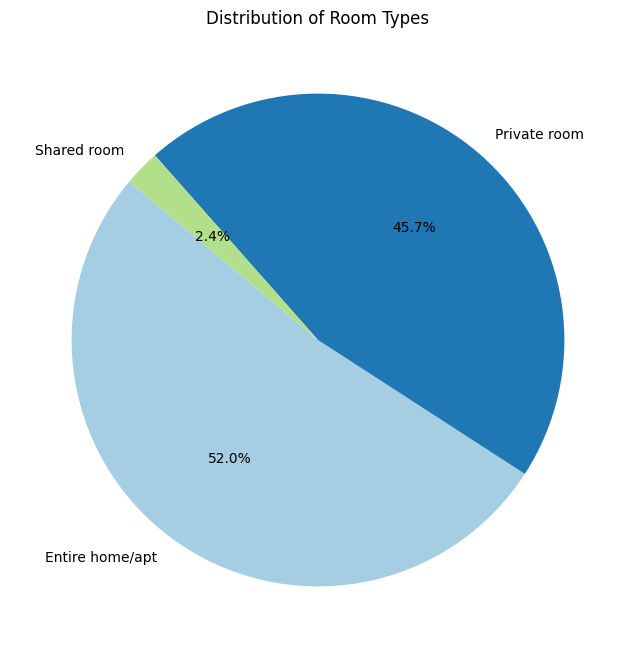

In [ ]:

# Selecting the dependent variable, assuming it is 'room_type'
dependent_variable = 'room_type'

# Count the occurrences of each category in the dependent variable
data_counts = airbnb_data[dependent_variable].value_counts()

# Plotting the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(data_counts))))

# Adding a title
plt.title('Distribution of Room Types')

# Display the pie chart
plt.show()


### ***1. Why did you pick the specific chart?***

**Categorical Data Representation:**The dependent variable, such as room_type, is categorical. Pie charts are particularly effective for displaying the proportions of different categories within a single variable.

**Visual Simplicity:**Pie charts offer a straightforward visual representation that makes it easy to understand the relative sizes of different categories at a glance. This can be especially useful for stakeholders who may not be familiar with more complex data visualizations.

**Proportion Comparison:**A pie chart highlights the relative proportions of categories in the dataset. This is useful for comparing how large or small each category is in relation to the others. For instance, it can quickly show which type of room is most common in the dataset.

**Commonly Used:**Pie charts are widely recognized and understood. They are commonly used in reports and presentations, making them a familiar choice for displaying categorical data.

### ***2. What is/are the insight(s) found from the chart?***

***Chart - 2 - State Vs. Average***

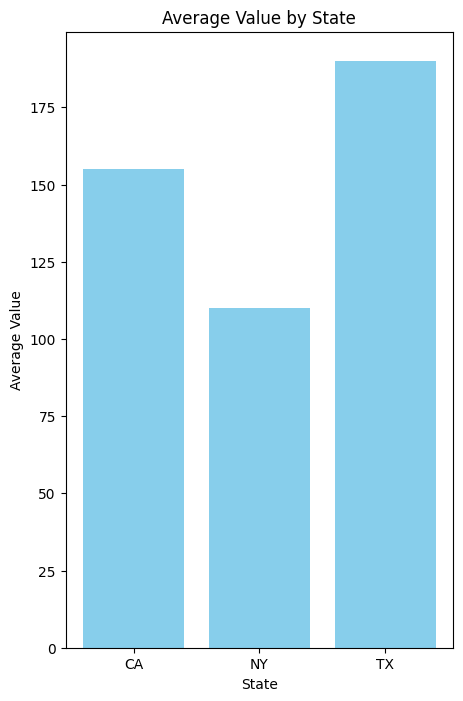

In [ ]:

data = pd.DataFrame({
    'state': ['NY', 'CA', 'TX', 'NY', 'CA', 'TX'],
    'value': [100, 150, 200, 120, 160, 180]
})

# Calculate average values by state
avg_values = data.groupby('state')['value'].mean().reset_index()

import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(5, 8))
plt.bar(avg_values['state'], avg_values['value'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Value')
plt.title('Average Value by State')
plt.show()



1. Why did you pick the specific chart?
Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

# **5. Solution to Business Objective**


What do you suggest the client to achieve Business Objective ?

1. Enhance Host Retention Strategies
Identify long-term hosts and offer them exclusive incentives such as reduced service fees, priority customer support, or promotional features on the platform.
Develop loyalty programs for hosts with high engagement and positive guest reviews to encourage sustained participation.
2. Improve New Host Onboarding
Provide training and resources for new hosts to optimize their listings, set competitive pricing, and understand customer expectations.
Introduce a mentorship program where experienced hosts can guide new entrants to improve their performance and retention.
3. Target Marketing for Host Longevity
Analyze trends among hosts with shorter account lengths to understand common reasons for their exit.
Implement targeted campaigns offering promotional discounts, better visibility, and seasonal incentives to encourage them to stay longer on the platform.
4. Optimize Pricing and Availability Strategies
Encourage hosts to adjust pricing dynamically based on demand patterns to maximize occupancy and revenue.
Promote long-term stays by offering discounts for extended bookings, which can provide stability for both hosts and guests.
5. Strengthen Community Engagement
Foster a sense of community by organizing networking events, workshops, and forums where hosts can share insights and experiences.
Introduce a feedback system where hosts can receive actionable insights to improve their listings and guest experience.

# **Conclusion**

The analysis of Airbnb NYC 2019 data highlights key opportunities for business growth. By focusing on host retention, improving onboarding processes, and implementing targeted marketing strategies, Airbnb can enhance its platform’s sustainability. Encouraging competitive pricing, promoting long-term stays, and strengthening community engagement will further contribute to host success and guest satisfaction. Implementing these strategies will not only improve overall user experience but also drive long-term profitability and market stability for Airbnb.